In [1]:
import h5py 
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

### Checking prescale features
This is the prescaled dataset

(61832690, 14)
(61832690,)


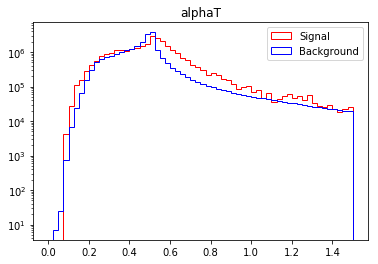

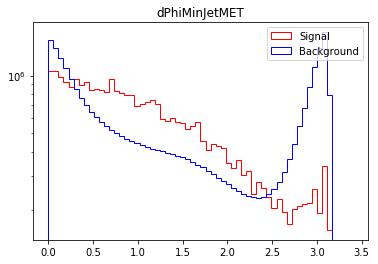

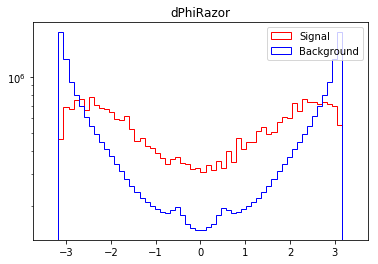

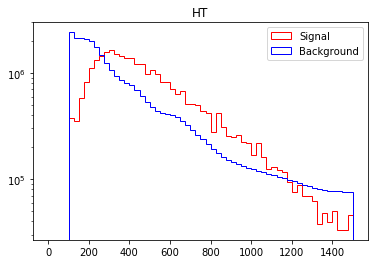

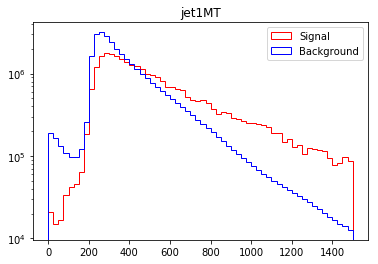

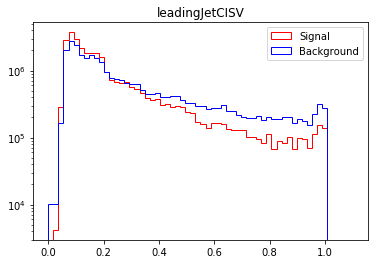

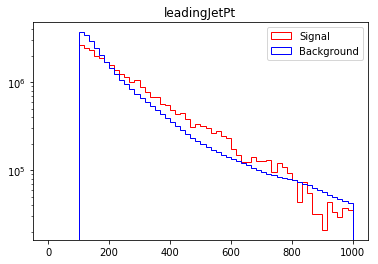

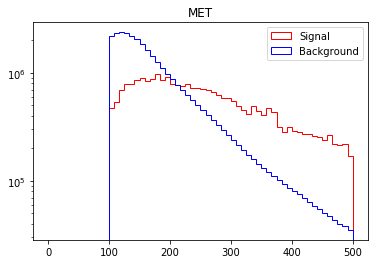

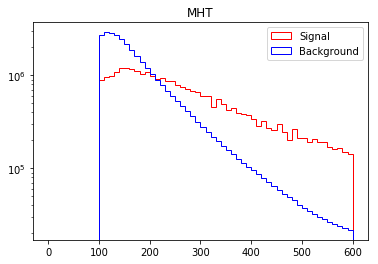

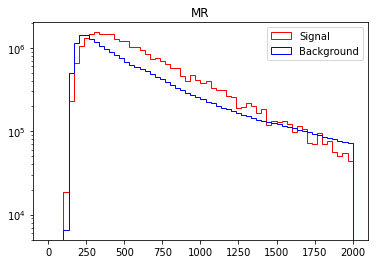

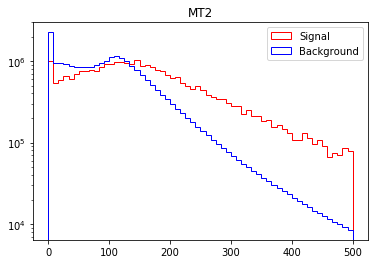

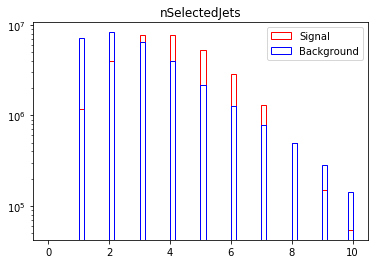

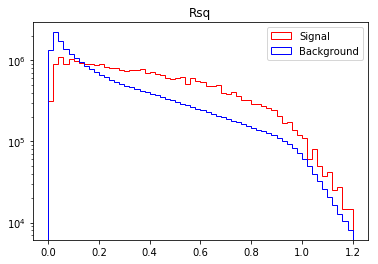

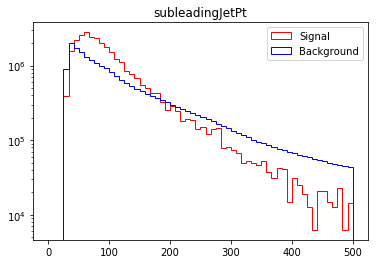

In [4]:
data = h5py.File("/bigdata/shared/analysis/CombinedDataset_Balanced.h5")
data.keys()
x_data = data['Training'][:]
label = x_data[:,0]
feature = x_data[:,2:]
print (feature.shape)
print (label.shape)
bkg_data = feature[np.where(label<0.5)]
sn_data = feature[np.where(label>0.5)]
def plot_compare_range(bkg_data, sn_data, order, label='', xlow=0, xhigh=1000):
    plt.figure()
    plt.hist(sn_data[:,order], bins=60, range=(xlow,xhigh), histtype='step', color='r', label='Signal')
    plt.hist(bkg_data[:,order], bins=60, range=(xlow, xhigh), histtype='step', color='b', label='Background')
    plt.title(label)
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
plot_compare_range(bkg_data, sn_data, 0, 'alphaT', 0, 1.5)
plot_compare_range(bkg_data, sn_data, 1, 'dPhiMinJetMET', 0., 3.4)
plot_compare_range(bkg_data, sn_data, 2, 'dPhiRazor', -3.4, 3.4)
plot_compare_range(bkg_data, sn_data, 3, 'HT', 0, 1500)
plot_compare_range(bkg_data, sn_data, 4, 'jet1MT', 0, 1500)
plot_compare_range(bkg_data, sn_data, 5, 'leadingJetCISV', 0, 1.1)
plot_compare_range(bkg_data, sn_data, 6, 'leadingJetPt', 0, 1000)
plot_compare_range(bkg_data, sn_data, 7, 'MET', 0, 500)
plot_compare_range(bkg_data, sn_data, 8, 'MHT', 0, 600)
plot_compare_range(bkg_data, sn_data, 9, 'MR', 0, 2000)
plot_compare_range(bkg_data, sn_data, 10, 'MT2', 0, 500)
plot_compare_range(bkg_data, sn_data, 11, 'nSelectedJets', 0, 10)
plot_compare_range(bkg_data, sn_data, 12, 'Rsq', 0, 1.2)
plot_compare_range(bkg_data, sn_data, 13, 'subleadingJetPt',0, 500)
data.close()

### Checking postscaled features
This is the direct input of the neural network, aka, post-scaled features.

Labels:'alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT','leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2','nSelectedJets','Rsq','subleadingJetPt'

(100000, 14)
(100000,)


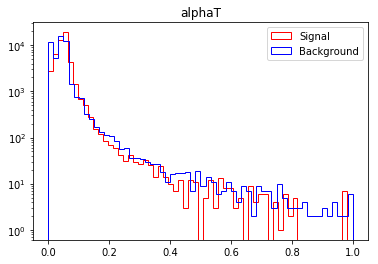

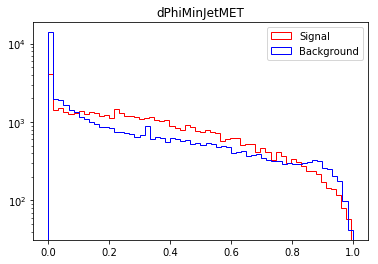

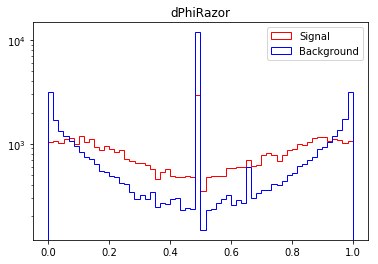

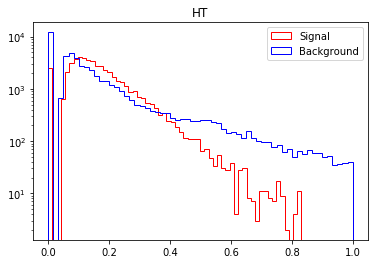

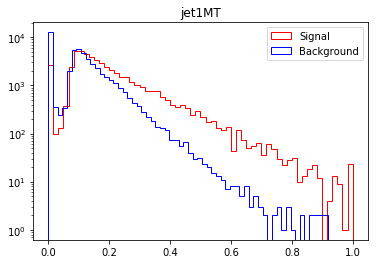

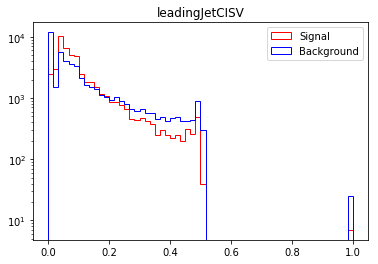

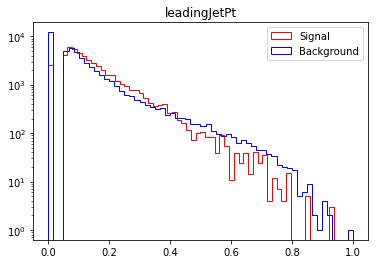

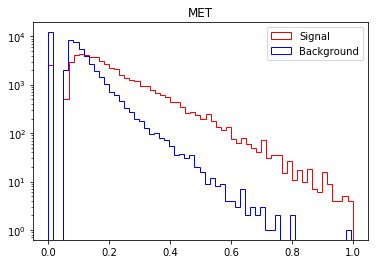

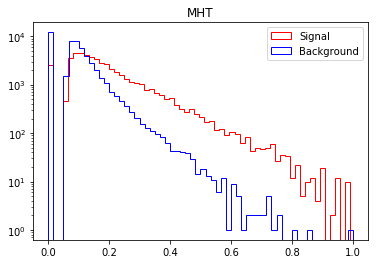

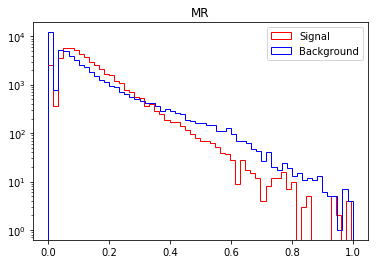

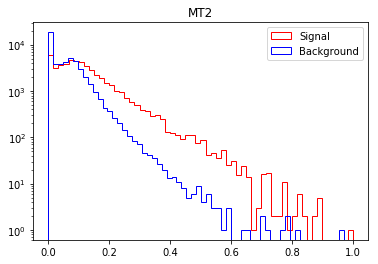

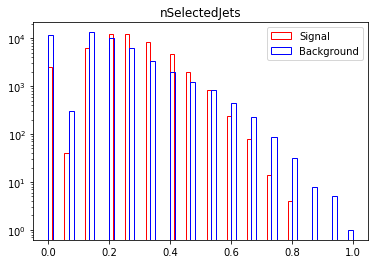

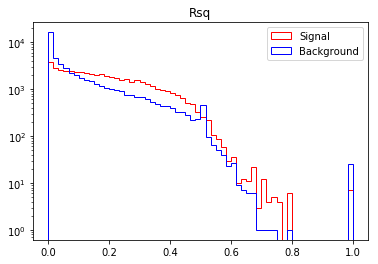

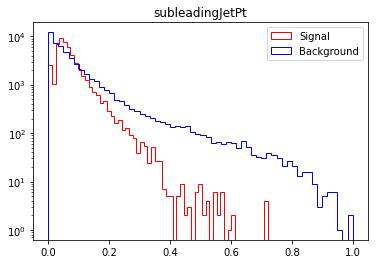

In [28]:
test = h5py.File("ScaledInput/TrainingDataset.h5")
test.keys()
test['x'].shape
test['y'].shape
y = test['y']
y_num = np.argmax(y,axis=1)
x = test['x'][:]
print (x.shape)
print (y_num.shape)
bkg = x[np.where(y_num<0.5)]
sn = x[np.where(y_num>0.5)]
def plot_compare(bkg, sn, order, label=''):
    plt.figure()
    plt.hist(sn[:,order], bins=60, histtype='step', color='r', label='Signal')
    plt.hist(bkg[:,order], bins=60, histtype='step', color='b', label='Background')
    plt.title(label)
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
plot_compare(bkg, sn, 0, 'alphaT')
plot_compare(bkg, sn, 1, 'dPhiMinJetMET')
plot_compare(bkg, sn, 2, 'dPhiRazor')
plot_compare(bkg, sn, 3, 'HT')
plot_compare(bkg, sn, 4, 'jet1MT')
plot_compare(bkg, sn, 5, 'leadingJetCISV')
plot_compare(bkg, sn, 6, 'leadingJetPt')
plot_compare(bkg, sn, 7, 'MET')
plot_compare(bkg, sn, 8, 'MHT')
plot_compare(bkg, sn, 9, 'MR')
plot_compare(bkg, sn, 10, 'MT2')
plot_compare(bkg, sn, 11, 'nSelectedJets')
plot_compare(bkg, sn, 12, 'Rsq')
plot_compare(bkg, sn, 13, 'subleadingJetPt')
test.close()

---
### Check the output score of the validation sample

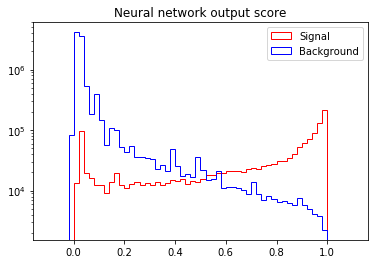

In [29]:
valrel = h5py.File("Result/ValidationResult1000000_Adam.h5","r")
valrel.keys()
val_pred = valrel['Prediction'][:,1]
val_truth = valrel['Truth'][:]
val_weight = valrel['Weight'][:]
val_sn = val_pred[np.where(val_truth>0.5)]
val_bkg = val_pred[np.where(val_truth<0.5)]
weight_sn = val_weight[np.where(val_truth>0.5)]
weight_bkg = val_weight[np.where(val_truth<0.5)]
plt.figure()
plt.hist(val_sn, weights=weight_sn, bins=60, range=(-0.1,1.1), histtype='step', color='r', label='Signal')
plt.hist(val_bkg, weights=weight_bkg, bins=60, range=(-0.1,1.1), histtype='step', color='b', label='Background')
plt.title('Neural network output score')
plt.legend(loc='best')
plt.yscale('log')
plt.show()
valrel.close()

---
### Benchmark study for optimizers, using 1M event sample

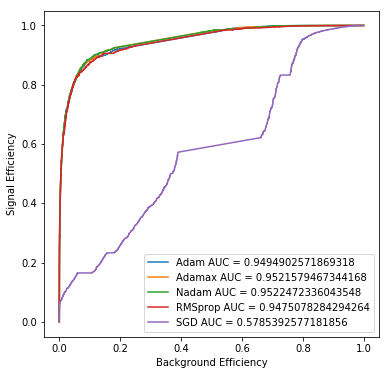

In [30]:
def get_roc_curve(label=''):
    valrel = h5py.File("Result/ValidationResult1000000_{}.h5".format(label),"r")
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    fpr, tpr, thresholds = roc_curve(val_truth, val_pred, sample_weight=val_weight)
    return fpr, tpr
def plot_roc(label=''):
    fpr, tpr = get_roc_curve(label)
    area = auc(fpr, tpr, reorder=True)
    plt.plot(fpr,tpr,label="{} AUC = {}".format(label, area))
plt.figure(figsize=(6.,6.))
plot_roc('Adam')
plot_roc('Adamax')
plot_roc('Nadam')
plot_roc('RMSprop')
plot_roc('SGD')
plt.ylabel('Signal Efficiency')
plt.xlabel('Background Efficiency')
plt.legend(loc='best')
plt.show()

Loser: SGD

The rest are more or less similar. Go with Nadam.

---
### Try a bigger network (Default 3 hidden layer size: 100, 30, 10)

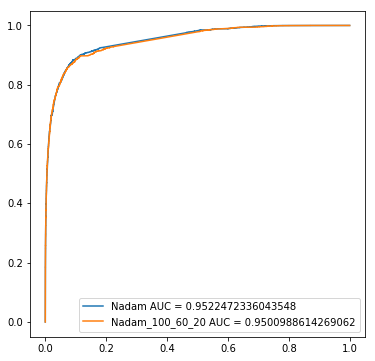

In [8]:
plt.figure(figsize=(6,6))
plot_roc('Nadam')
plot_roc('Nadam_100_60_20')
plt.legend(loc='best')
plt.show()

Bigger doesn't mean better. Stick with (100, 30, 10) architecture.

---
### Training on full dataset (60 M events)

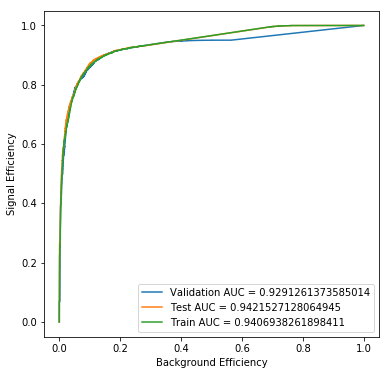

In [31]:
def get_roc_curve(file_name=''):
    valrel = h5py.File(file_name,"r")
    assert(valrel)
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    fpr, tpr, thresholds = roc_curve(val_truth, val_pred, sample_weight=val_weight)
    return fpr, tpr
def plot_roc(file_name='',label=''):
    fpr, tpr = get_roc_curve(file_name)
    area = auc(fpr, tpr, reorder=True)
    plt.plot(fpr,tpr,label="{} AUC = {}".format(label, area))
plt.figure(figsize=(6.,6.))
plot_roc("Result/ValidationResult0_Nadam.h5",'Validation')
plot_roc("Result/TestResult0_Nadam.h5",'Test')
plot_roc("Result/TrainResult0_Nadam.h5",'Train')
plt.ylabel('Signal Efficiency')
plt.xlabel('Background Efficiency')
plt.legend(loc='best')
plt.show()

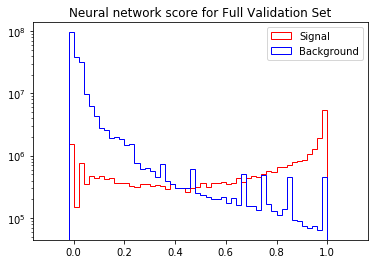

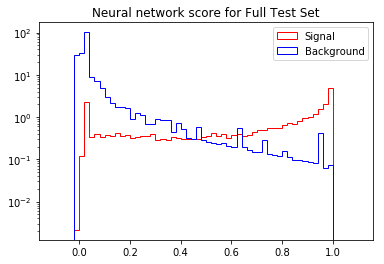

In [32]:
def get_score(file_name='', title=''):
    valrel = h5py.File(file_name,"r")
    assert valrel
    valrel.keys()
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    val_sn = val_pred[np.where(val_truth>0.5)]
    val_bkg = val_pred[np.where(val_truth<0.5)]
    weight_sn = val_weight[np.where(val_truth>0.5)]
    weight_bkg = val_weight[np.where(val_truth<0.5)]
    plt.figure()
    plt.hist(val_sn, weights=weight_sn, bins=60, range=(-0.1,1.1), histtype='step', color='r', label='Signal')
    plt.hist(val_bkg, weights=weight_bkg, bins=60, range=(-0.1,1.1), histtype='step', color='b', label='Background')
    plt.title('Neural network score for {}'.format(title))
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
    valrel.close()
get_score("Result/ValidationResult0_Nadam.h5", "Full Validation Set")
get_score("Result/TestResult0_Nadam.h5", "Full Test Set")

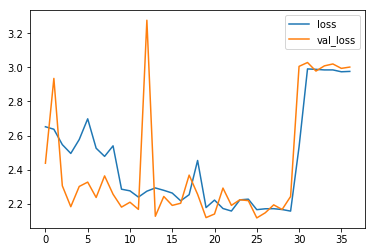

In [33]:
import pickle

history = pickle.load(open("History/history0.sav","rb"))
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()